## **Netflix Movie Catalog Exploratory Data Analysis**
#### By: Hayden Allison | 6/11/23
#### Highlights: Feature Engineering & Operating System Programming & Regression Plots
#### Report Type: Continuous Quantitative, Retrospective Observational Study Including Inferential Statistics
#### Programming Method: Python Object Oriented
#### Population: Netflix Video Catalog
#### Samples: Movies & Shows & Videos by Genre

<img src="gold_filigree_small.png" alt="Gold Filigree Image">

## Research Questions:
* What's the average season length? Does this change over time or by genre?
* Does runtime vary between genres or video type (movie & show)?
* How fast are videos being released, and is that yearly trend a constant increase? How many are allocated to each genre?
* For shows: is imdb score correlated to seasons or runtime?
* For movies: is imdb score correlated to runtime?
* Is imdb score correlated to genres or age certification?
## Measures Analyzed of Population
1. Minimum & Maximum: Inspected to determine why minimums/maximums of response variables are populated. Crucial for detecting variance within tables & charts.
2. Mean: Provides evidence for trends. These trends are utilized for substantiating claims derived from included datasets. Allows concise charts to be created, as it eliminates the need for every value to be plotted of a category/series.
3. Median: Middle value for center highlights.
4. Mode: Densest value for center highlights.
5. Sum: Provides evidence for response variable totals. In the absence of summing those attributes, approximations would have to be relayed instead of exact data. 
6. Distributions: Density speaks volumns about patterns within a subset of data.
7. Quartiles: Quarter 1 & Quarter 3 are encoded to be discussed for an accurate analysis of distributions.
8. Standard Deviation: To dive deeper into understanding distributions.
9. Confidence Interval: Accuracy measurement.

## Introduction
The research question is analyzed with two datasets: titles and credits. Titles contains information pertaining to the features & production of a movie or show, such as: IMBD rating, runtime, genre, etc. A variety of variables are explored to gain a level of understanding for the mechanisms in place which encourage a high caliber rating and what their correlation to each other variable is. Backwards compatibility is inspected to determine if these favorable variables to a highly rated title exist as unfavorable to a lowly rated title. Credits contains information information pertaining to the cast of movie or show, which includes: name, character, and role. Due to its limited data stature relevance compared to Titles, this dataset is analyzed minimally; in order to stay focused on the more influential variables.

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from scipy.stats import iqr
from collections import Counter
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from matplotlib.font_manager import FontProperties
import warnings

# Filter out future warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Initializing & Cleaning Credits Data Source
This dataset was chosen due to its relativity to titles. While minimal in it's nature, the data does potentially contain influential variables to the outcome of our research question. Data is validated to be accurate and contains no errors or duplicate values outside of the roles & names attribute. Roles has a \r included at the end of values. Names has full names, for clarification this is separated into first and last name attributes. These were fixed by individual algorithm.

<img src="gold_filigree_small.png" alt="Gold Filigree Image">

In [2]:
# Credit table
df_c = pd.read_csv(r"C:\Users\tekre\Downloads\Netflix_Credits_Raw.csv")

# Creating directory for project and credits file
if not os.path.exists(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables"):
    os.makedirs(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables")
df_c.to_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Credits_Raw.csv")

# Correcting table structure
df_c.drop('Unnamed: 0', axis=1, inplace=True)
print(df_c.shape)
print(str(pd.unique(df_c['role'])) + '\n')
print(df_c.info())
df_c

(54589, 4)
['ACTOR\r' 'DIRECTOR\r']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54589 entries, 0 to 54588
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   person_id  54589 non-null  object
 1   id         54589 non-null  object
 2   name       47845 non-null  object
 3   role       54589 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB
None


,person_id,id,name,role
0,tm174683,Tamsin Greig,Additional Voices (voice),ACTOR\r
1,tm287684,Arsher Ali,Phil,ACTOR\r
2,tm239927,Katherine Kelly,Jacqueline Jones,ACTOR\r
3,tm1040671,Miriam Leone,Clara,ACTOR\r
4,tm1040671,Stefano Accorsi,Diego,ACTOR\r
...,...,...,...,...
54584,tm1080445,Paul Abell,C.I.A. Agent #1,ACTOR\r
54585,tm1080445,Grace Russo,Teenage Girl #1,ACTOR\r
54586,tm1080445,Camille Marquez,Elena,ACTOR\r
54587,tm1080445,Irina Aylyarova,Czech Doctor,ACTOR\r


In [3]:
# Python isn't recognizing the \r for any string operations. An algorithm that dissects only the proper word is created
# With a syntax that avoids literal string referencing
temp = list(df_c.loc[:, 'role'].astype(str))
new = []
item2 = 'Actor'
item3 = 'Director'
for item in temp:
    if len(item) < 8:
        new.append(item2)
    else:
        new.append(item3)
df_c['role'] = new

# Checking for missing values
print(df_c.isna().sum().sum())

# Splitting first name and last name within name attribute to separate columns
first_name = []
last_name = []
for item in df_c['id']:
    names = item.split(' ')
    first_name.append(names[0])
    last_name.append(names[-1])
df_c['first_name'] = first_name
df_c['last_name'] = last_name
df_c.drop('id', axis=1, inplace=True)
df_c.rename({'name':'character'}, inplace=True)
df_c

6744


,person_id,name,role,first_name,last_name
0,tm174683,Additional Voices (voice),Actor,Tamsin,Greig
1,tm287684,Phil,Actor,Arsher,Ali
2,tm239927,Jacqueline Jones,Actor,Katherine,Kelly
3,tm1040671,Clara,Actor,Miriam,Leone
4,tm1040671,Diego,Actor,Stefano,Accorsi
...,...,...,...,...,...
54584,tm1080445,C.I.A. Agent #1,Actor,Paul,Abell
54585,tm1080445,Teenage Girl #1,Actor,Grace,Russo
54586,tm1080445,Elena,Actor,Camille,Marquez
54587,tm1080445,Czech Doctor,Actor,Irina,Aylyarova


In [4]:
# Read in data as a dataframe
netflix = pd.read_csv(r"C:\Users\tekre\Downloads\Netflix_Titles_Raw.csv")

# Saving file to analysis directory
netflix.to_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Titles_Raw.csv")

print(netflix.shape)
netflix.head()

(5850, 15)


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


## Initializing & Cleaning Titles Data Source
This data source is utilized due to the congregation of descriptive data pertaining to Netflix's video library. With reviews, genre, release date, runtime, and more its enables a deep exploratory dive into the mechanisms behind highly & lowly rated videos. It was manually downloaded from Kaggle. Ignored attributes in this analysis only include title and description in order to paint the highest resolution image possible about any relationships taking affect.

In [5]:
# Dropping unneeded columns
netflix.drop(['id', 'imdb_id', 'tmdb_score', 'tmdb_popularity', 'imdb_votes'], axis=1, inplace=True)

# Renaming columns to preferred names
netflix.rename({'genres':'genre', 'production_countries':'production_country'}, axis=1, inplace=True)
netflix.head()

,title,type,description,release_year,age_certification,runtime,genre,production_country,seasons,imdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,8.2
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,7.7
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,8.2
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,7.7


In [6]:
# looking for null values
print(netflix.isna().sum())

# Dealing with NaNs
netflix.description.fillna('No description given', inplace=True)
netflix.title.fillna('No title given', inplace=True)

# looking for null values
print('\nAFTER DESCRIPTION & TITLE NULL SUBSTITUTE:\n' + str(netflix.type.value_counts()))
netflix.isna().sum()

title                    1
type                     0
description             18
release_year             0
age_certification     2619
runtime                  0
genre                    0
production_country       0
seasons               3744
imdb_score             482
dtype: int64

AFTER DESCRIPTION & TITLE NULL SUBSTITUTE:
type
MOVIE    3744
SHOW     2106
Name: count, dtype: int64


title                    0
type                     0
description              0
release_year             0
age_certification     2619
runtime                  0
genre                    0
production_country       0
seasons               3744
imdb_score             482
dtype: int64

#### Imputing missing values using mean & mode

In [7]:
# Imputing modes into age_certification & imdb_score NULLs
print(netflix.imdb_score.mean())
print('\n BEFORE IMPUTES:\n' + str(netflix.age_certification.value_counts()))

# Mode imputer
def mode_col_imputer(df, col):
    df_copy = df.copy()
    simple_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    simple_imputed = simple_imp.fit_transform(df_copy[[col]])
    df_copy[[col]] = simple_imputed.astype(object)
    return df_copy

# Mean imputer
def mean_col_imputer(df, col):
    df_copy = df.copy()
    simple_imp = IterativeImputer(missing_values=np.nan, random_state=2)
    simple_imputed = simple_imp.fit_transform(df_copy[[col]])
    df_copy[col] = simple_imputed
    return df_copy

netflix = mode_col_imputer(netflix, 'age_certification')
netflix = mean_col_imputer(netflix, 'imdb_score')

print('\nAFTER IMPUTES:\n' + str(netflix.age_certification.value_counts()))
print('\n' + str(netflix.isna().sum()))

6.510860655737705

 BEFORE IMPUTES:
age_certification
TV-MA    883
R        556
TV-14    474
PG-13    451
PG       233
TV-PG    188
G        124
TV-Y7    120
TV-Y     107
TV-G      79
NC-17     16
Name: count, dtype: int64

AFTER IMPUTES:
age_certification
TV-MA    3502
R         556
TV-14     474
PG-13     451
PG        233
TV-PG     188
G         124
TV-Y7     120
TV-Y      107
TV-G       79
NC-17      16
Name: count, dtype: int64

title                    0
type                     0
description              0
release_year             0
age_certification        0
runtime                  0
genre                    0
production_country       0
seasons               3744
imdb_score               0
dtype: int64


In [8]:
print(netflix.imdb_score.value_counts())
netflix.imdb_score = netflix.imdb_score.round(1)
print('\nAFTER ROUND:\n' + str(netflix.imdb_score.value_counts()))

imdb_score
6.510861    482
6.500000    206
7.100000    200
7.400000    197
6.700000    196
           ... 
9.600000      1
2.400000      1
1.600000      1
9.200000      1
1.700000      1
Name: count, Length: 81, dtype: int64

AFTER ROUND:
imdb_score
6.5    688
7.1    200
7.4    197
6.7    196
6.8    191
      ... 
9.2      1
1.7      1
9.6      1
2.4      1
1.6      1
Name: count, Length: 80, dtype: int64


#### There are 3,744 NaNs in 'seasons' because those are movies... season subtable will be initialized to eradicate these *pests.*

In [9]:
# Replacing NULL seasons with 0
netflix = netflix.fillna(0)
netflix.isna().sum()

title                 0
type                  0
description           0
release_year          0
age_certification     0
runtime               0
genre                 0
production_country    0
seasons               0
imdb_score            0
dtype: int64

In [10]:
# Netflix table configuration details
print(netflix.shape)
print('\n' + str(netflix.columns))
print('\n' + str(netflix.dtypes))

(5850, 10)

Index(['title', 'type', 'description', 'release_year', 'age_certification',
       'runtime', 'genre', 'production_country', 'seasons', 'imdb_score'],
      dtype='object')

title                  object
type                   object
description            object
release_year            int64
age_certification      object
runtime                 int64
genre                  object
production_country     object
seasons               float64
imdb_score            float64
dtype: object


In [11]:
# Final cleanups (making sure there are categories for each variable)
netflix.production_country.replace('[]', "['No country listed']", inplace=True)
netflix.genre.replace('[]', "['No genre listed']", inplace=True)
netflix.head()

,title,type,description,release_year,age_certification,runtime,genre,production_country,seasons,imdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,6.5
1,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],0.0,8.2
2,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],0.0,7.7
3,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],0.0,8.2
4,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,TV-MA,150,"['war', 'action']","['GB', 'US']",0.0,7.7


### Preliminary EDA & Outliers

In [12]:
netflix.describe(include='all')

,title,type,description,release_year,age_certification,runtime,genre,production_country,seasons,imdb_score
count,5850,5850,5850,5850.000000,5850,5850.000000,5850,5850,5850.000000,5850.000000
unique,5799,2,5830,NaN,11,NaN,1726,452,NaN,NaN
top,The Gift,MOVIE,No description given,NaN,TV-MA,NaN,['comedy'],['US'],NaN,NaN
freq,3,3744,18,NaN,3502,NaN,484,1959,NaN,NaN
mean,NaN,NaN,NaN,2016.417094,NaN,76.888889,NaN,NaN,0.778632,6.509966
std,NaN,NaN,NaN,6.937726,NaN,39.002509,NaN,NaN,1.918422,1.114846
min,NaN,NaN,NaN,1945.000000,NaN,0.000000,NaN,NaN,0.000000,1.500000
25%,NaN,NaN,NaN,2016.000000,NaN,44.000000,NaN,NaN,0.000000,5.900000
50%,NaN,NaN,NaN,2018.000000,NaN,83.000000,NaN,NaN,0.000000,6.500000
75%,NaN,NaN,NaN,2020.000000,NaN,104.000000,NaN,NaN,1.000000,7.300000


#### Netflix table statistics
* There are 5850 records available.
* Some title repeats (5799 unique titles).
* Most ratings are TV-MA.
* Top genre: 'comedy'.
* There are 1726 unique genres (this could include crossovers *('adventure, western' as opposed to 'adventure', 'western')*).
* There are 452 countries producing films for Netflix, but the US is the top producer.
* Average number of seasons is 2.3 with a max number of seasons all the way up to 42!
* Average IMDb score is 6.5 with a top score of 9.6.
* Runtime average is 77 minutes with a max of 240.
* Most releases were around 2016, but date as far back as 1945.
* Seasons, runtime, and release year have outliers. 

#### Netflix movies and shows subtables for charts.

In [13]:
netflix_movies = netflix.query('type == "MOVIE"').copy()

netflix_shows = netflix.query('type == "SHOW"').copy()
print('SHOWS SUBTABLE:\n' + str(netflix_shows.type.value_counts()))
print('\nMOVIES SUBTABLE:\n' + str(netflix_movies.type.value_counts()))

SHOWS SUBTABLE:
type
SHOW    2106
Name: count, dtype: int64

MOVIES SUBTABLE:
type
MOVIE    3744
Name: count, dtype: int64


## Visualizations Contrived Analysis
#### These research questions are on the menu and will be explored in sequential fashion:
1. Whats the average season length? Does this change over time or by genre?
2. Does runtime vary between genres or video type (movie & show)?
3. How fast are videos being released, and is that yearly trend a constant increase? How many are allocated to each genre?
4. For shows: is imdb score correlated to seasons or runtime?
5. For movies: is imdb score correlated to runtime?
6. Is imdb score correlated to genres or age certification?

<img src="gold_filigree_small.png" alt="Gold Filigree Image">

In [14]:
# Pre-chart setup
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'font.size': 11, 'axes.titlesize': 14,
                'axes.titlepad': 20}
sns.set(style='darkgrid', palette='rocket_r', font='monospace', rc=custom_params)

## *Research Question #1*
#### *What's the average season length? Does this change over time or by genre?*
### Univariate Analysis
* What are population distributions of season lengths?
* Is mode for seasons a low number like 2?
* Is there a yearly trend for season length?

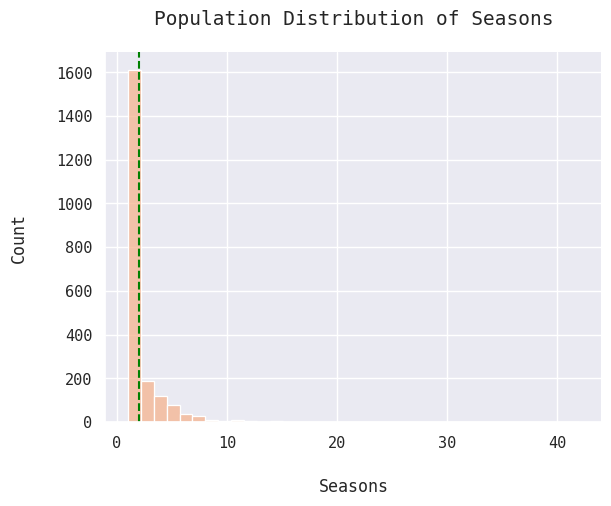

In [15]:
sns.histplot(data=netflix_shows, x='seasons', bins=35)
plt.title('Population Distribution of Seasons')
plt.xlabel('Seasons', labelpad=20)
plt.ylabel('Count', labelpad=20)

q1rtR3 = np.quantile(netflix_shows.seasons, .75)
plt.axvline(x=q1rtR3, label='Q3', c='g', linestyle='dashed')
plt.show()

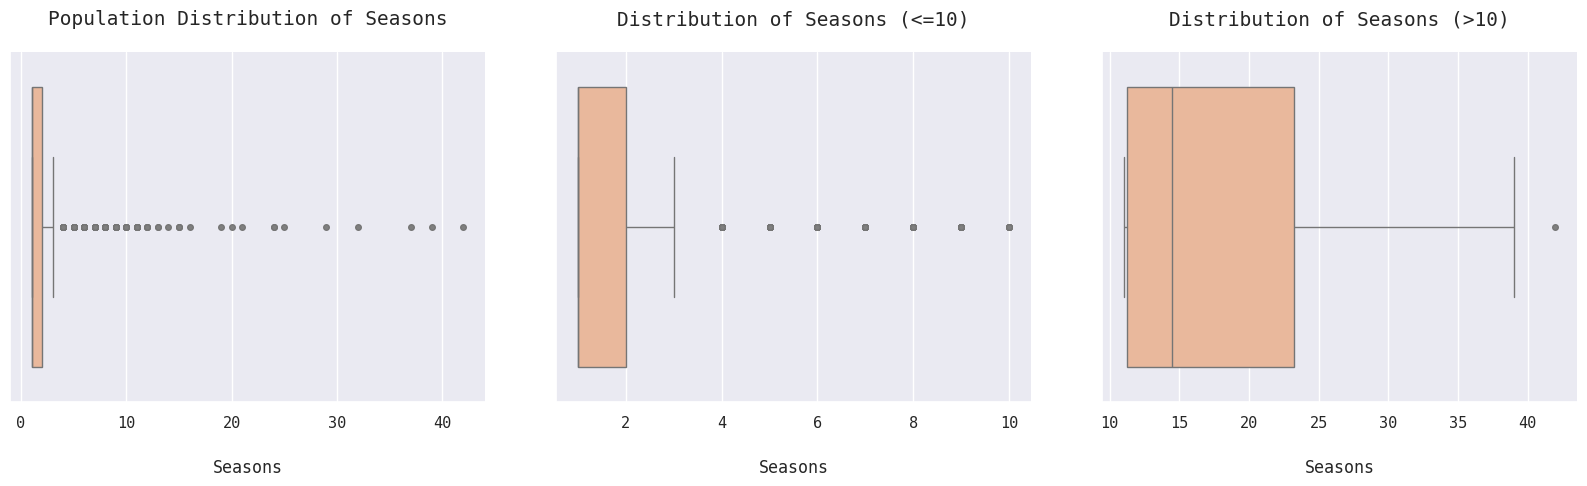

count    2106.000000
mean        2.162868
std         2.689041
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        42.000000
Name: seasons, dtype: float64

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# CHART 1: Population Distribution of Seasons
sns.boxplot(x=netflix_shows.seasons, ax=axes[0], flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
axes[0].set_title('Population Distribution of Seasons')
axes[0].set_xlabel('Seasons', labelpad=20)

# CHART 2: Distribution of Seasons no Outliers (<=15)
no_outliers_1 = netflix_shows.loc[netflix_shows['seasons'] <= 10, 'seasons']
sns.boxplot(x=no_outliers_1, ax=axes[1], flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
axes[1].set_title('Distribution of Seasons (<=10)')
axes[1].set_xlabel('Seasons', labelpad=20)

# CHART 3: Distribution of Seasons no Outliers (>15)
no_outliers_2 = netflix_shows.loc[netflix_shows['seasons'] > 10, 'seasons']
sns.boxplot(x=no_outliers_2, ax=axes[2], flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
axes[2].set_title('Distribution of Seasons (>10)')
axes[2].set_xlabel('Seasons', labelpad=20)

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()

netflix_shows.seasons.describe()

#### Population Distribution of Seasons Analysis
Standard deviation for this category is 2.89, while max = 42 and min = 1. Due to how Netflix's platform operates and viewer retention capacities, the mode for season output by shows is 1. Looking at the first chart, we can see that this mode is so prelevant, the green dashed line marking the 75% quartile is on 1. 2 seasons population is a mere fraction of its predecessor, which turns out to be 1/8th. Take a moment at these bottom boxplots: the first is a bit warped due to this distribution which includes outliers. To unwarp, this is split into 2 box plots, the middle one for 15 seasons or less then the last for over 15 seasons. The last boxplot does have an additional ~15 season ticks over the middle. We can see that when TV shows get a larger amount of seasons (>15), it tends to  fall within the 21-33 range. Median here is 24.
### Bivariate Analysis
* Seasonal trend over the years since first show to recent shows?
* This same trend but only using the yearly mean for seasons?
* Any points of interest in this chart?

In [17]:
# Yearly mean to create a 2nd line chart type
yearly_seasons = netflix_shows[['seasons', 'release_year']].query('release_year >= 1985')
yearly_seasons.head(4)

,seasons,release_year
35,9.0,1989
46,5.0,1989
53,4.0,1989
59,13.0,1987


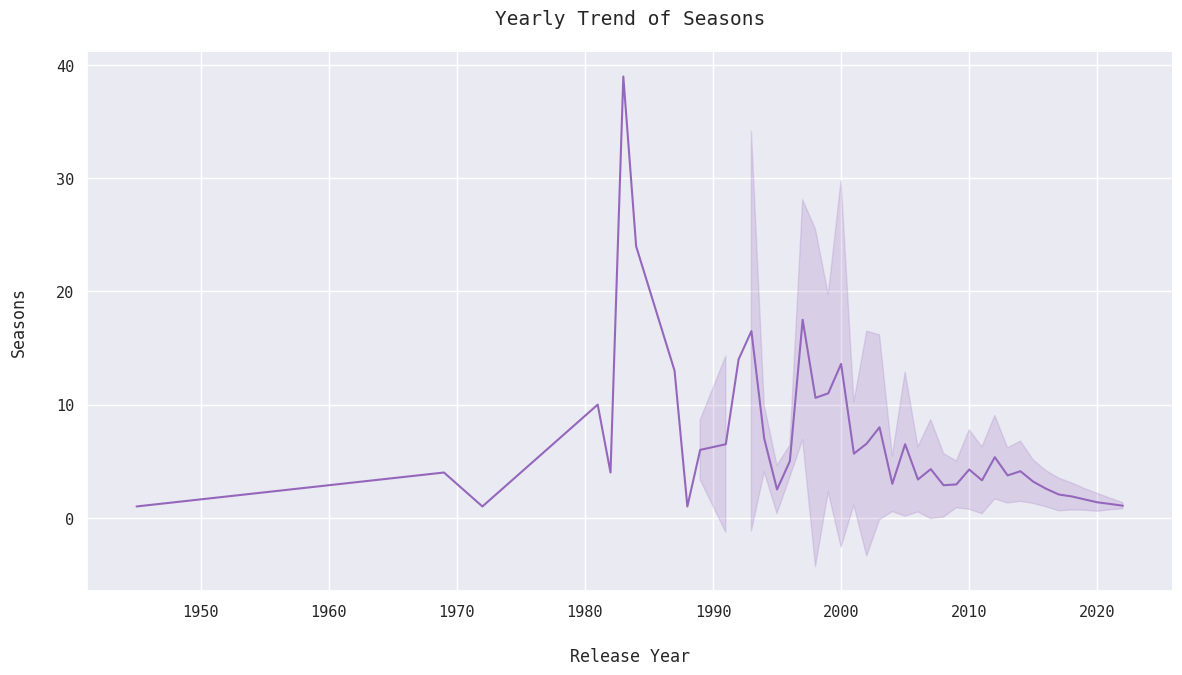

In [18]:
plt.figure(figsize=(14,7))
sns.lineplot(data=netflix_shows, x='release_year', y='seasons', ci='sd', color='tab:purple')
plt.xlabel('Release Year', labelpad=20)
plt.ylabel('Seasons', labelpad=20)
plt.title('Yearly Trend of Seasons')
plt.show()

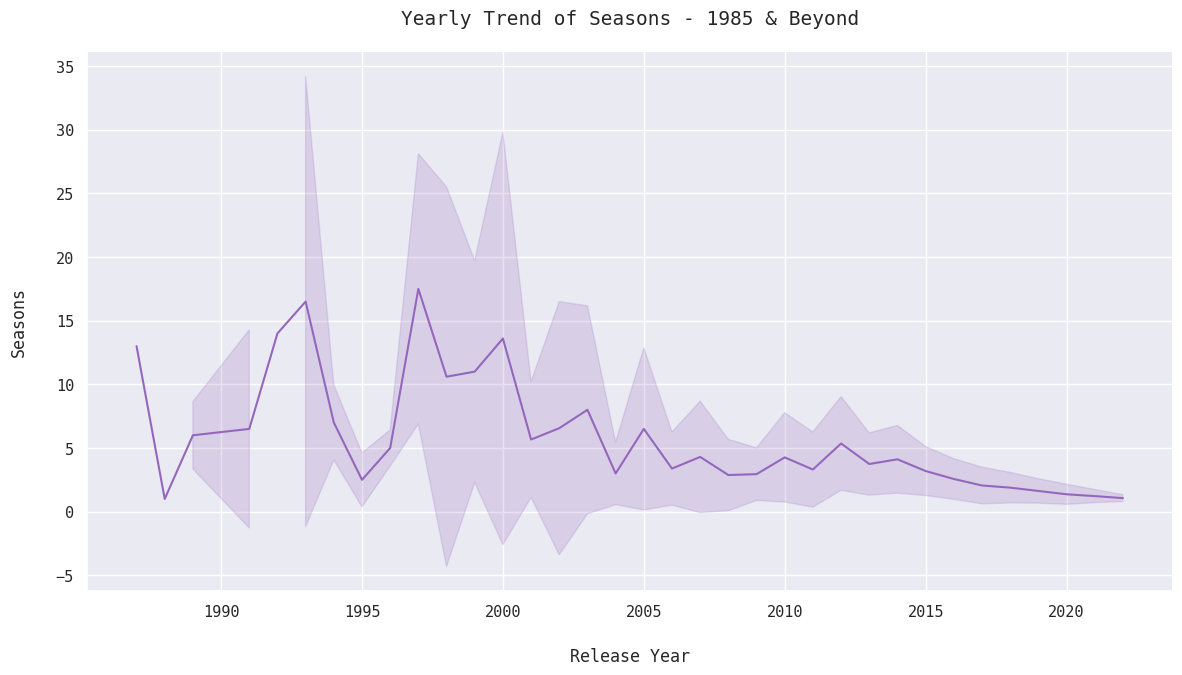

           seasons  release_year
count  2099.000000   2099.000000
mean      2.130538   2017.533587
std       2.519158      4.702918
min       1.000000   1987.000000
25%       1.000000   2017.000000
50%       1.000000   2019.000000
75%       2.000000   2020.000000
max      42.000000   2022.000000


In [19]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_seasons, x='release_year', y='seasons', ci='sd', color='tab:purple')
plt.xlabel('Release Year', labelpad=20)
plt.ylabel('Seasons', labelpad=20)
plt.title('Yearly Trend of Seasons - 1985 & Beyond')
plt.show()
print(yearly_seasons.describe())

#### Yearly Trend of Seasons Analysis
Bottom chart is merely a snapshot of top chart for a depiction with improved accuracy. The max appears as 42 seasons by a year ~1985. After this peak, 2 years have the runnerup max with a value of 16 & 17 seasons which belongs to years 1993 & 1997. Puple solid line represent average per year, while shaded region around line represents standard deviation for each year. This shaded region informs how years 1993, 1997, and 2000 contain diverse values thats proportional to their population. Recent years indicate less diversity in seasonal output. Year 2000 was a clear turning point where Netflix decided to focus on smaller seasonal shows. This reduction continually drops off until year 2022 where it's population diversity (standard deviation shade) only includes and additional 1 or 2 values.

#### To analyze season breakdown per non-crossover genres, an algorithm is required
Non-crossover shows are picked for the simplicity of creating a subtable. Not 100% accurate since its a 1477 record sample from the netflix table of slightly over 5000 records, but it's accurate enough.

In [20]:
# Counting amount of shows missing a genre
print(netflix_shows.loc[netflix_shows['genre'] == "['No genre listed']"].size)

# Inspecting a show's genre value to understand the list's below formatting
test = netflix_shows.genre.values
print('\nSingle list value test: ' + str(len(test[5])))
print(test[5])

# List of unique genres only (single-value genres)
list = []
for item in test:
    if item.count(',') == 0:
        list.append(item)

# Removing duplicate values with via set conversion
unique_genres = set(list)
print('\n' + str(set(unique_genres)))

250

Single list value test: 72
['animation', 'family', 'comedy', 'fantasy', 'drama', 'action', 'music']

{"['crime']", "['western']", "['music']", "['comedy']", "['drama']", "['reality']", "['family']", "['horror']", "['scifi']", "['No genre listed']", "['thriller']", "['war']", "['documentation']", "['action']", "['animation']"}


In [21]:
# Subtable for non-crossover shows
genre_sample = netflix.query('genre in @unique_genres').copy()

# Removing unneccessary brackets and quotations for cleaner charts
genre_sample['genre'] = genre_sample['genre'].str.replace('[', '').str.replace(']', '').str.replace("'", '')
genre_sample.loc[genre_sample['genre'] == 'No genre listed', 'genre'] = 'N/A'

print(genre_sample.genre.value_counts())
genre_sample.head(4)

genre
comedy           484
documentation    329
drama            328
reality          113
animation         62
N/A               59
thriller          29
horror            17
family            17
action            14
music              9
crime              6
scifi              5
war                4
western            1
Name: count, dtype: int64


,title,type,description,release_year,age_certification,runtime,genre,production_country,seasons,imdb_score
0,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,documentation,['US'],1.0,6.5
6,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,comedy,['GB'],0.0,8.0
17,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,TV-MA,133,drama,['EG'],0.0,7.2
18,The Land,MOVIE,"Set in 1933, the mayor informs the peasants th...",1969,TV-MA,129,drama,['EG'],0.0,8.1


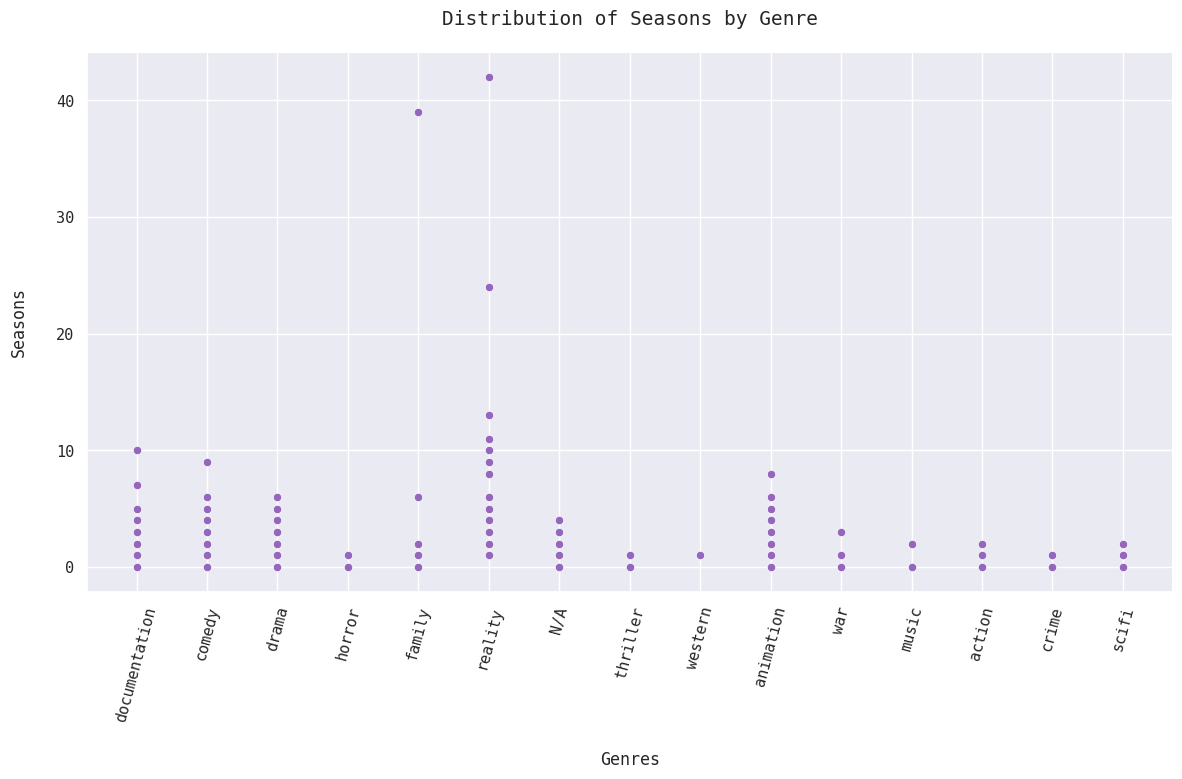

count    1477.000000
mean        0.656060
std         2.006642
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        42.000000
Name: seasons, dtype: float64


In [22]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=genre_sample, x='genre', y='seasons', color='tab:purple')
plt.xticks(rotation=75)
plt.ylabel('Seasons', labelpad=20)
plt.xlabel('Genres', labelpad=20)
plt.title('Distribution of Seasons by Genre')
plt.show()
print(genre_sample.seasons.describe())

#### Distribution of Seasons by Genre Analysis
There is specific genres that cater to higher-season loving audiences. Reality & family genres extend the scatter plot y-ticks by a considerable amount because of the 2 shows containing 39 & 42 seasons. These shows contain more than double the average seasons of shows within their genre. With these outliers disregarded for a moment, nearly all other shows are at 10 seasons or less, with a couple exeptions. Documentation, comedy, drama, reality, animation, family, and drama are prone to running for longer period of time, in other words garnering a higher amount of seasons, versus other genres. These audiences are profitable long-term.
## *Research Question #2*
#### *Does runtime vary between genres or video type (movie & show)?*
### Univariate Analysis
* What is population distribution of runtime?
* Movie runtimes?
* Show runtimes?

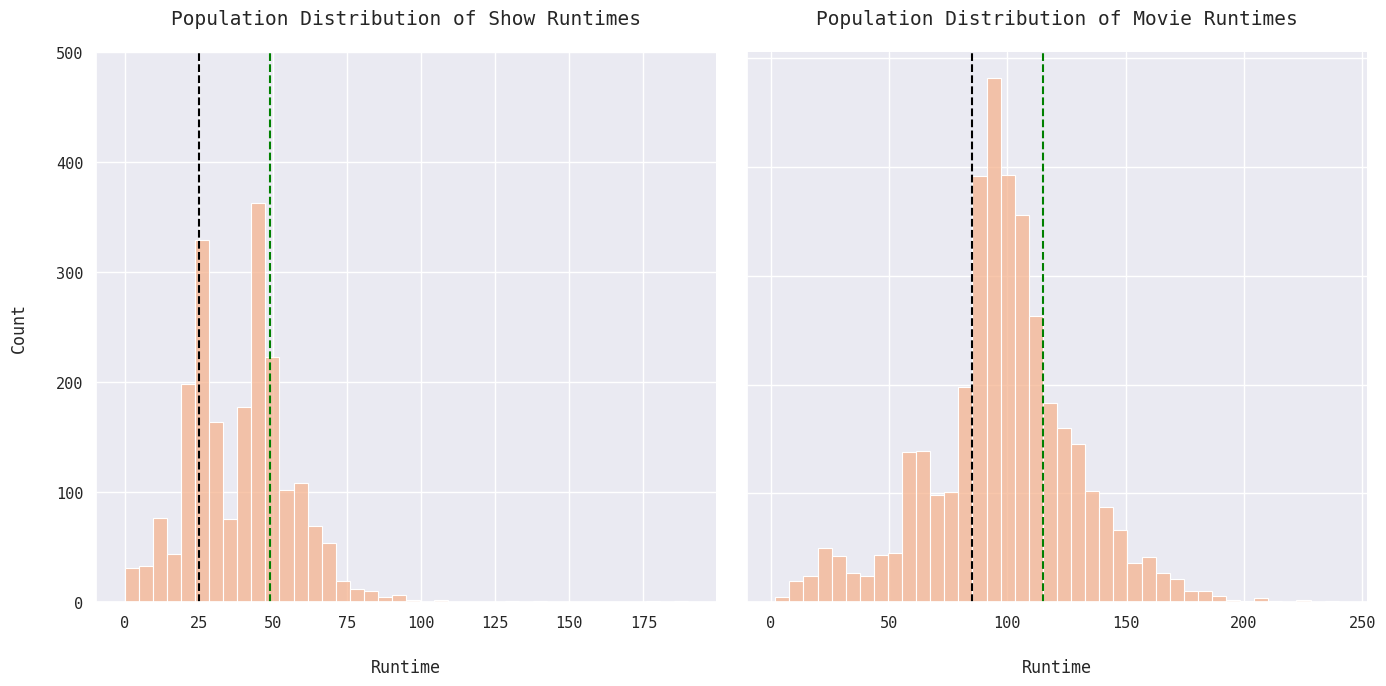

Show statistics:
count    2106.000000
mean       38.978158
std        17.626354
min         0.000000
25%        25.000000
50%        41.000000
75%        49.000000
max       190.000000
Name: runtime, dtype: float64
0    24
Name: runtime, dtype: int64

Movie statistics:
count    3744.000000
mean       98.213675
std        30.640640
min         2.000000
25%        85.000000
50%        98.000000
75%       115.000000
max       240.000000
Name: runtime, dtype: float64
0    90
Name: runtime, dtype: int64


In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14,7))
sns.histplot(netflix_shows.runtime, bins=40, ax=axes[0])
q1rt = np.quantile(netflix_shows.runtime, .25)
q1rtR3 = np.quantile(netflix_shows.runtime, .75)
axes[0].axvline(x=q1rtR3, label='Q3', c='g', linestyle='dashed')
axes[0].axvline(x=q1rt, label='Q1', c='black', linestyle='dashed')
axes[0].set_ylabel('Count', labelpad=20)
axes[0].set_xlabel('Runtime', labelpad=20)
axes[0].set_title('Population Distribution of Show Runtimes')
axes[0].set_yticks(range(0, 501, 100))

sns.histplot(netflix_movies.runtime, bins=40, ax=axes[1])
q1 = np.quantile(netflix_movies.runtime, .25)
q3 = np.quantile(netflix_movies.runtime, .75)
axes[1].axvline(x=q1, label='Q1', c='black', linestyle='dashed')
axes[1].axvline(x=q3, label='Q3', c='g', linestyle='dashed')
axes[1].set_ylabel('')
axes[1].set_xlabel('Runtime', labelpad=20)
axes[1].set_title('Population Distribution of Movie Runtimes')
axes[1].set(yticklabels=[])

plt.tight_layout()
plt.subplots_adjust(wspace=.05)
plt.show()

print('Show statistics:')
print(netflix_shows.runtime.describe())
print(netflix_shows.runtime.mode())
print('\nMovie statistics:')
print(netflix_movies.runtime.describe())
print(netflix_movies.runtime.mode())

#### Population Distribution of Show & Movie Runtimes Analysis
Between the 2 charts there is a x-tick disparity. Shows cap off @175 while Movies cap off @250. This is realistic as movies tend to have longer run times. Evidence is provided for this proposition by the quartile dotted green & black lines. 25% - 75% for shows is at 25 - 49, for movies is 85 - 115. Movies are on average 60 - 66 minutes longer. Shows is unimodial at 24 and Movies is also unimodial at 90. While movies has a single peak and single decline, shows has double. Shows similarly popular at ~45 minutes runtime, which is a bit shy of the mode 24 minutes.
### Bivariate Analysis
* What is population distribution of runtime by Genre?
* Are there genres more diverse in runtime than others?
* Which genres contain the outliers? What is the max value before outliers begin?

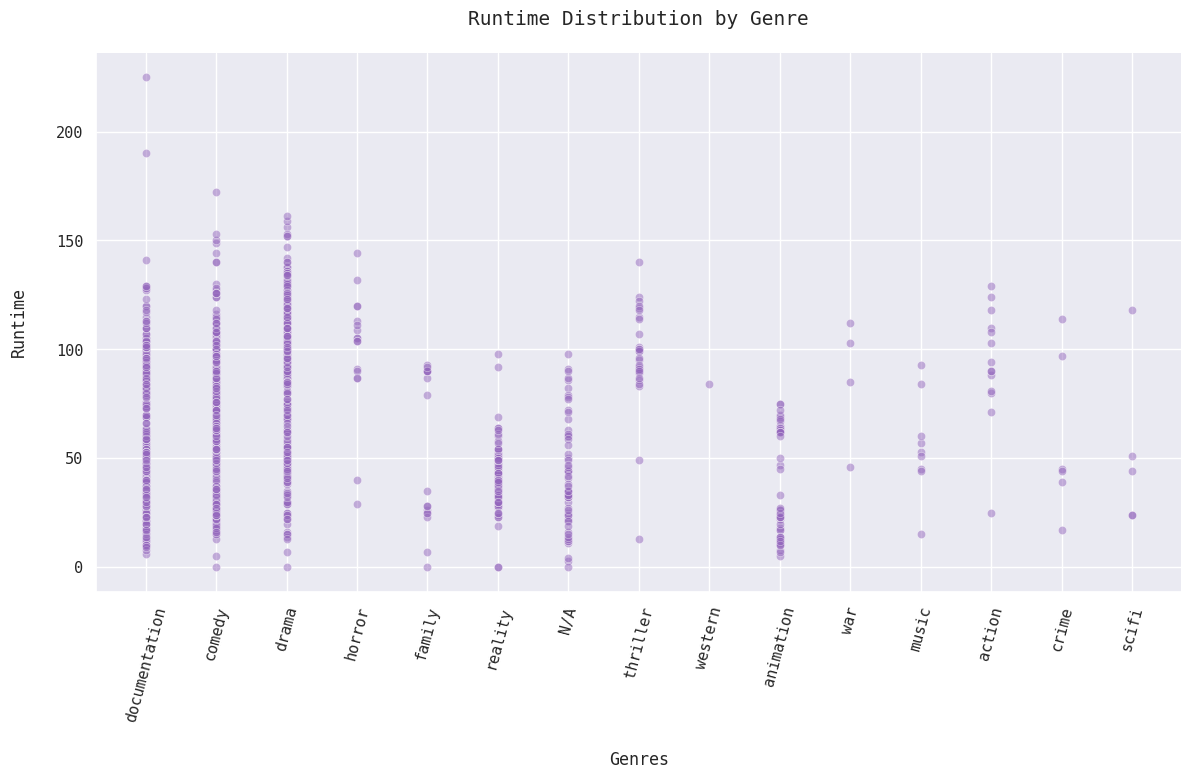

In [24]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=genre_sample, x='genre', y='runtime', color='tab:purple', alpha=0.5)
plt.xticks(rotation=75)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Genres', labelpad=20)
plt.title('Runtime Distribution by Genre')
plt.show()

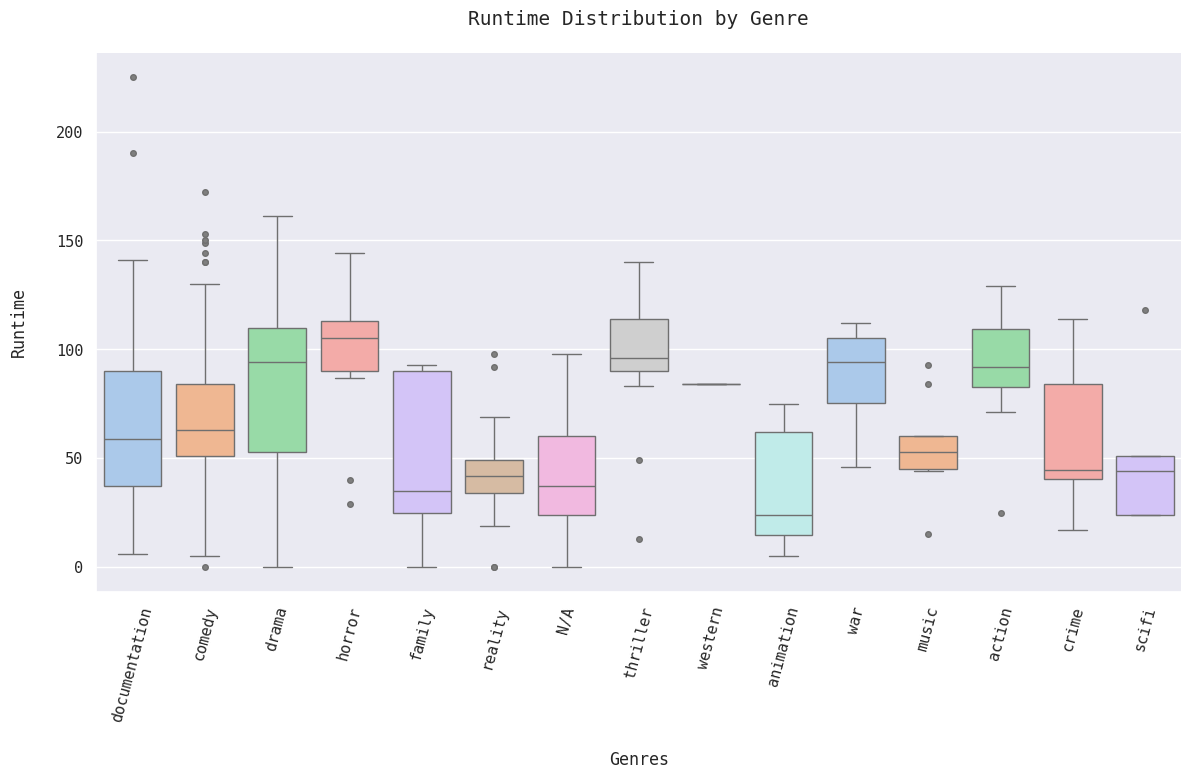

count    1477.000000
mean       66.844279
std        33.035152
min         0.000000
25%        42.000000
50%        63.000000
75%        92.000000
max       225.000000
Name: runtime, dtype: float64


In [50]:
plt.figure(figsize=(14,7))
sns.boxplot(data=genre_sample, x='genre', y='runtime', palette='pastel', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.xticks(rotation=75)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Genres', labelpad=20)
plt.title('Runtime Distribution by Genre')
plt.show()
print(genre_sample['runtime'].describe())

#### Runtime Distribution by Genre Analysis
Genre_sample subtable includes both movies & shows because choosing only one restricted the already restricted record quanitity contained. The genres with diverse runtime records are documentation, comedy, drama, and N/A. It's noticable due to the longer & darker purple lines. Contrasting these is western, war, and music; which barely peak abve 100 minutes besides 2 records under war. Standard deviation is 33.03 and mean is 66.84. Concluding from this data, a population that is quite dispersed in runtime. Top diverse genres have looser guidelines for runtime. Throughout all genres, it's hard to justify a video above 150 minutes.
## *Research Question #3*
#### *How fast are videos being released, and is that yearly trend a constant increase? How many are allocated to each genre?*
### Univariate Analysis
* How many videos per genre?
* Is there competition for the max value or does one genre have it by a longshot?
* Does movie totals replicate in show totals?

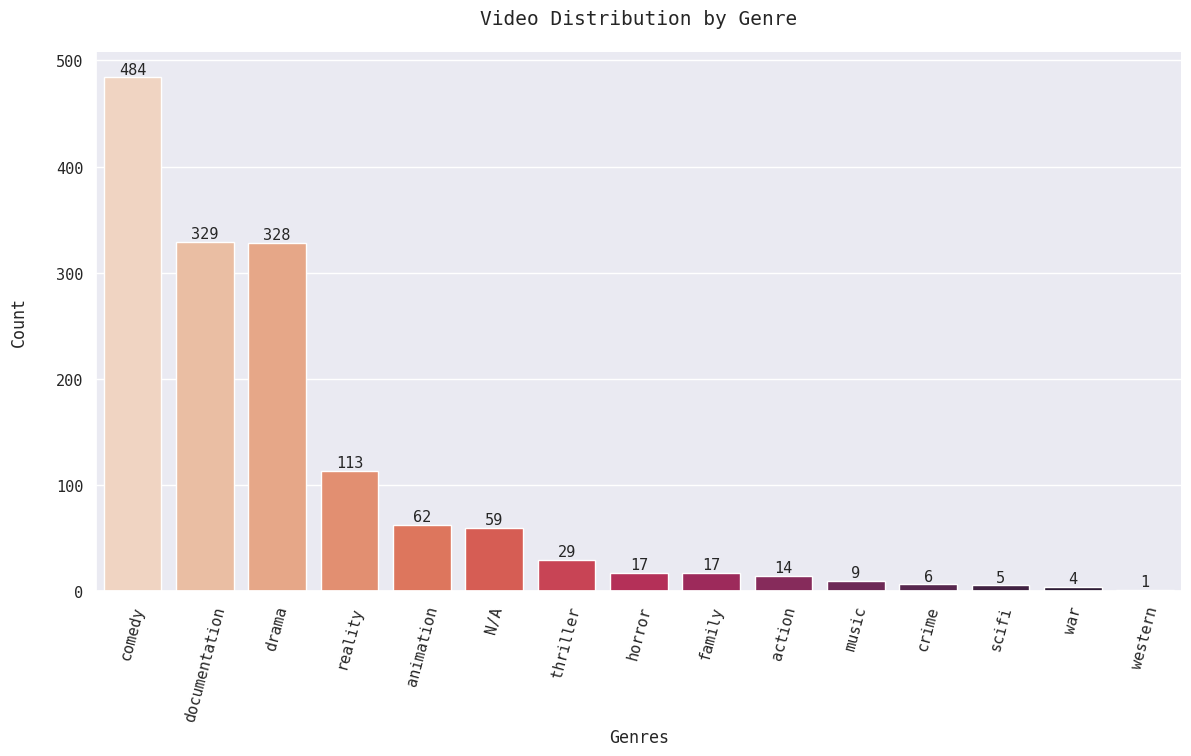

In [26]:
order = genre_sample['genre'].value_counts().index
plt.figure(figsize=(14, 7))
sns.countplot(data=genre_sample, x='genre', order=order, palette='rocket_r')
plt.xticks(rotation=75)
plt.ylabel('Count', labelpad=20)
plt.xlabel('Genres')
plt.title('Video Distribution by Genre')

# Printing values on bars
clarity_counts = genre_sample['genre'].value_counts()
for i in range(clarity_counts.shape[0]):
    total = clarity_counts[i]
    plt.text(i, total+15, total, va='top', ha='center')
plt.show()

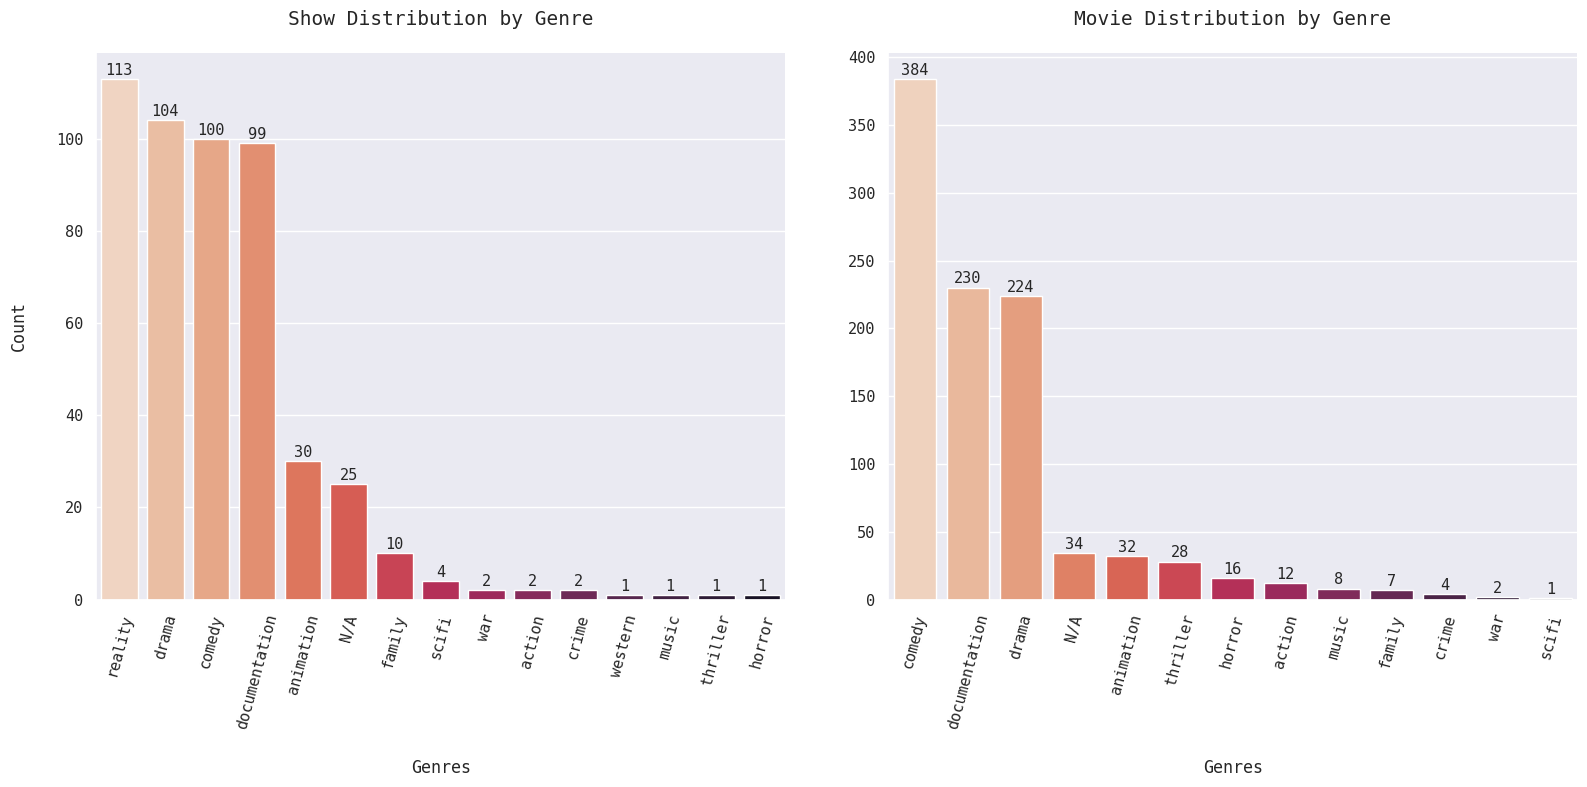

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
order_show = genre_sample.loc[genre_sample['type']=='SHOW', 'genre'].value_counts().index
order_show2 = genre_sample.loc[genre_sample['type']=='SHOW', 'genre'].value_counts()
axes[0] = sns.countplot(data=genre_sample.loc[genre_sample['type']=='SHOW'], x='genre', order=order_show,
                        palette='rocket_r', ax=axes[0])
axes[0].set_ylabel('Count', labelpad=20)
axes[0].set_xlabel('Genres', labelpad=20)
axes[0].set_title('Show Distribution by Genre')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)

# Printing values on bar
for i in range(order_show2.shape[0]):
    total = order_show2[i]
    axes[0].text(i, total+3.5, total, va='top', ha='center')

order_movie = genre_sample.loc[genre_sample['type']=='MOVIE', 'genre'].value_counts().index
order_movie2 = genre_sample.loc[genre_sample['type']=='MOVIE', 'genre'].value_counts()
axes[1] = sns.countplot(data=genre_sample.loc[genre_sample['type']=='MOVIE'], x='genre', order=order_movie,
                        palette='rocket_r', ax=axes[1])
axes[1].set_ylabel('')
axes[1].set_xlabel('Genres', labelpad=20)
axes[1].set_title('Movie Distribution by Genre')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)

# Printing values on bar
for i in range(order_movie2.shape[0]):
    total = order_movie2[i]
    axes[1].text(i, total+12, total, va='top', ha='center')

plt.tight_layout()
plt.subplots_adjust(wspace=0.15)
plt.show()

#### Video Distribution by Genre Analysis
Overall video distribution is primarily populated by drama (328), comedy (484), documentation (329), and reality videos. Interestingly, reality is purely a show genre. So the fact that it beats other genres such as animation or horror was unseen. Horror, thriller, and music are typically in a movie format. People appreciate humor over all other video aspects. Western movies are nonexistant within the sample. The next dominant genres can be summarized as realistic fiction, consisting of documentaries, dramas and reality.
### Bivariate Analysis
* What are population distributions of release dates?
* Which years have the highest production count?
* Does production increase year over year?

In [28]:
# Subtable of all netflix videos for question analysis
yearly_videos = netflix.groupby('release_year').count().reset_index()
yearly_v = yearly_videos[['release_year', 'title']].copy()
yearly_v.rename(columns={'title':'count'}, inplace=True)
yearly_v

,release_year,count
0,1945,1
1,1954,2
2,1956,1
3,1958,1
4,1959,1
...,...,...
58,2018,773
59,2019,836
60,2020,814
61,2021,787


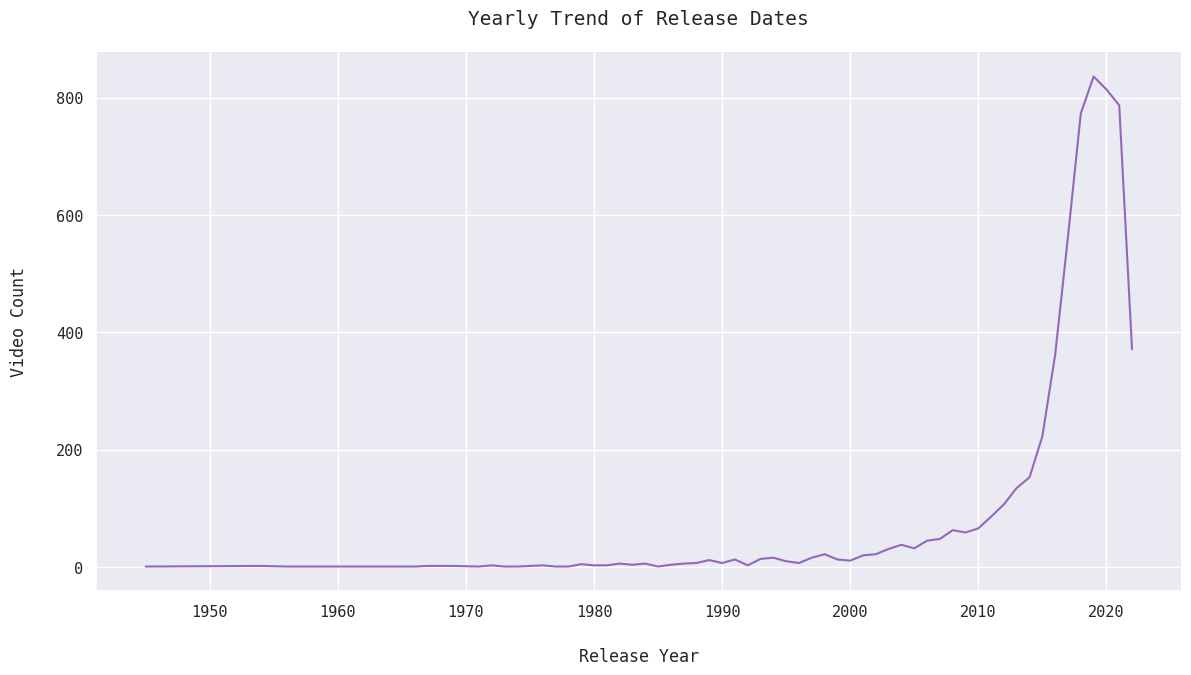

In [29]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_v, x='release_year', y='count', color='tab:purple')
plt.xlabel('Release Year', labelpad=20)
plt.ylabel('Video Count', labelpad=20)
plt.title('Yearly Trend of Release Dates')
plt.show()

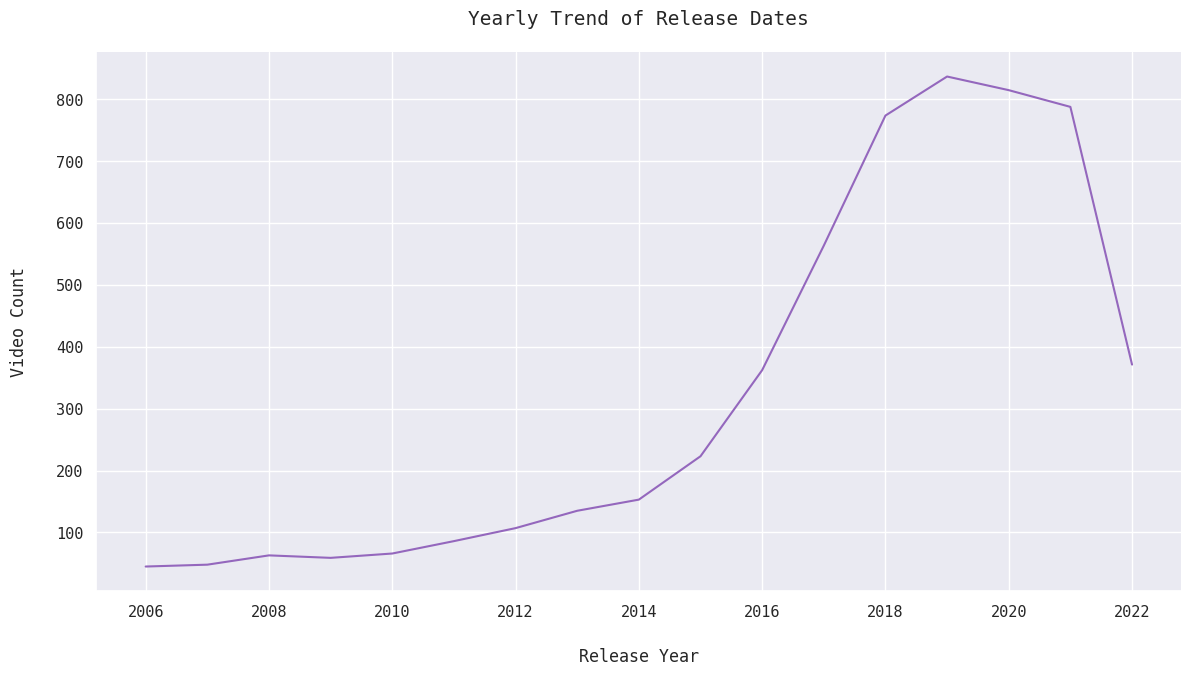

       release_year       count
count     63.000000   63.000000
mean    1990.095238   92.857143
std       19.832943  210.750109
min     1945.000000    1.000000
25%     1975.500000    2.000000
50%     1991.000000    7.000000
75%     2006.500000   46.500000
max     2022.000000  836.000000


In [30]:
plt.figure(figsize=(14,7))
sns.lineplot(data=yearly_v.query('release_year > 2005'), x='release_year', y='count', color='tab:purple')
plt.xlabel('Release Year', labelpad=20)
plt.ylabel('Video Count', labelpad=20)
plt.title('Yearly Trend of Release Dates')
plt.show()
print(yearly_v.describe())

#### Yearly Trend of Release Dates Analysis
The bottom chart is a snapshot of the rise beginning in 2005. Differences between years before 2005 are minimal. None ever cross the 50 count threshold, with a tendency to slighty rise and then fall. Videos produced in 2005 are of interest to the public generally more than previous year films. The quantity of videos rises exponentially beginning in year ~2013. Audiences respond well to these videos or Netflix would not have such a massive influx of these within it's catalog. The max is a whopping 836 videos. I believe the drop of 2021 to 2022 tells a story. Netflix likely purchased rights to many films already on the market, and after these swooping purchases has limited options on the table and is turning to organically produced content. Standard deviation is 210.75 which resonates well given the exponential increase from ~50 videos to ~800.
## *Research Question #4*
#### *For shows: is imdb score correlated to seasons or runtime?*
### Bivariate Analysis
* What imdb scores contain higher runtimes?
* Which imdb scores contain higher seasons?
* At what region of values is the population most dense?
#### Imdb score can be any value (including decimals) 1-10. These are rounded to integers for charts.

In [31]:
# Function to round score in all tables
def imdb_rounder(table):
    rounded_table = table.copy()
    values = [item for item in table['imdb_score'].values]
    input = []
    for item in values:
        rounded = round(item)
        input.append(rounded)
    rounded_table['imdb_score'] = input
    return rounded_table

netflix_shows = imdb_rounder(netflix_shows)
netflix_movies = imdb_rounder(netflix_movies)
netflix = imdb_rounder(netflix)

# Validating scores
print(netflix['imdb_score'].value_counts())

imdb_score
6     2112
7     1687
8     1028
5      603
4      242
9       95
3       58
2       22
10       3
Name: count, dtype: int64


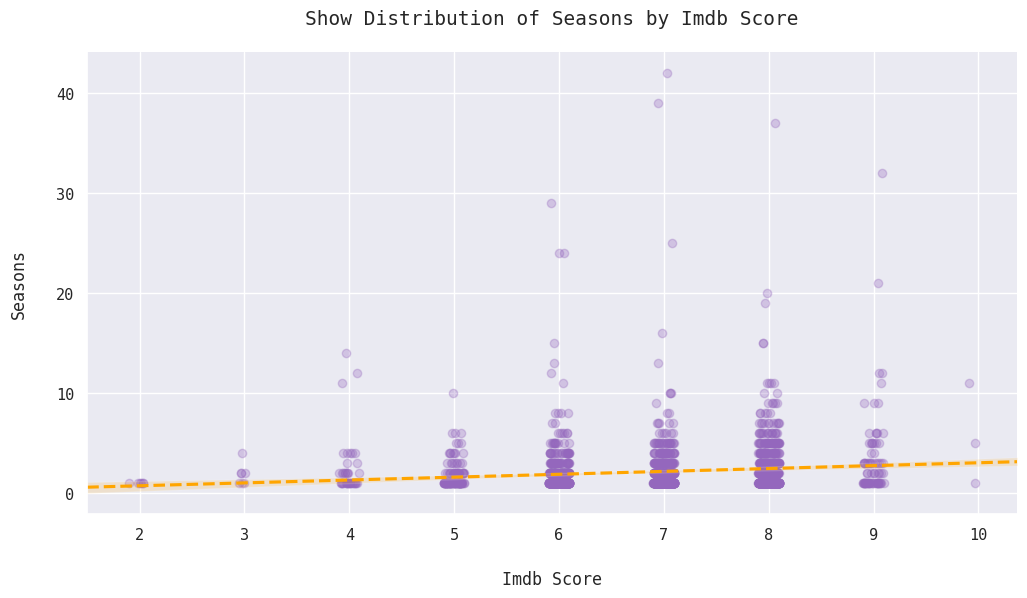

In [32]:
plt.figure(figsize=(12,6))
sns.regplot(data=netflix_shows, x='imdb_score', y='seasons', color='tab:purple', scatter_kws={'alpha':0.3},
            x_jitter=.1, line_kws={'color':'orange', 'linestyle':'dashed'}, truncate=False)
plt.ylabel('Seasons', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Seasons by Imdb Score')
plt.show()

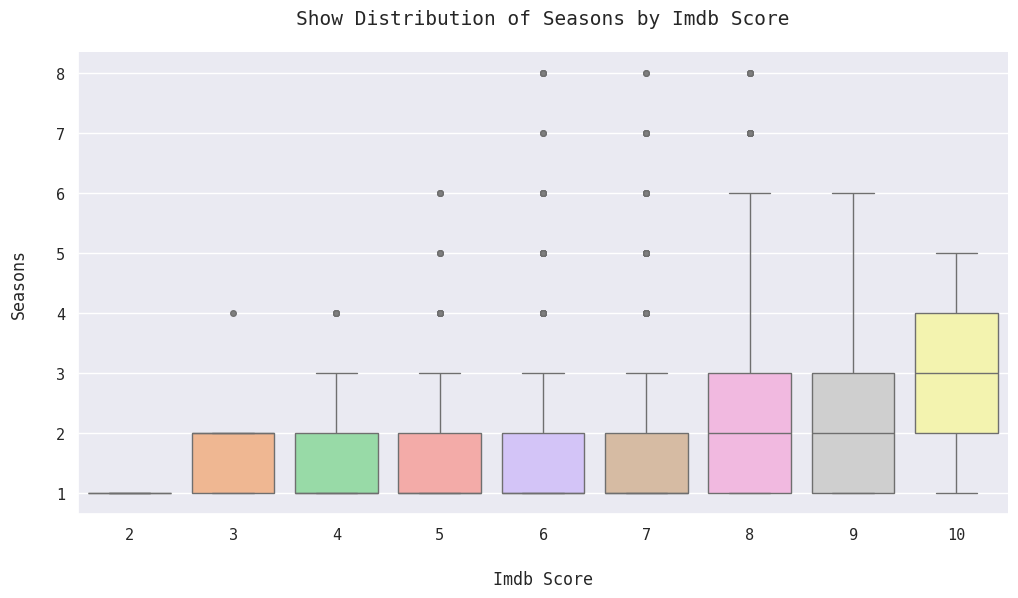

In [33]:
# Reducing outliers for boxplot
show_box = netflix_shows.loc[netflix_shows['seasons']<=8]

plt.figure(figsize=(12,6))
sns.boxplot(data=show_box, x='imdb_score', y='seasons', palette='pastel', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.ylabel('Seasons', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Seasons by Imdb Score')
plt.show()

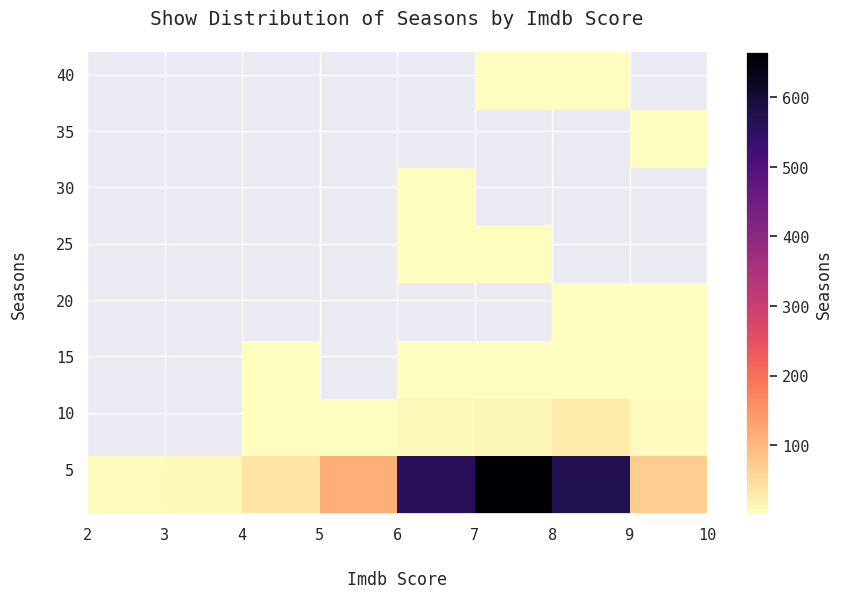

In [34]:
plt.figure(figsize=(10,6))
plt.hist2d(data=netflix_shows, x='imdb_score', y='seasons', cmap='magma_r', cmin=1, bins=8)
plt.ylabel('Seasons', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Seasons by Imdb Score')
plt.colorbar(label='Seasons')
plt.show()

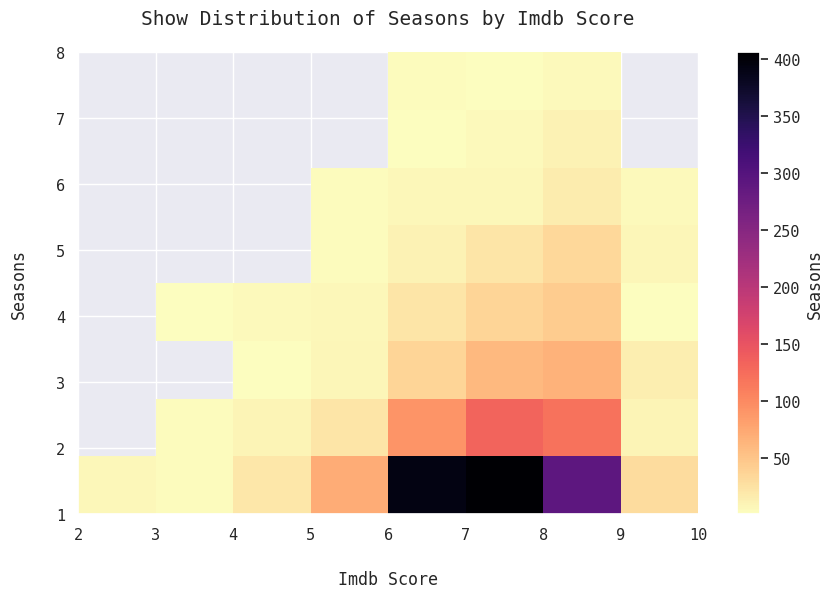

In [35]:
plt.figure(figsize=(10,6))
plt.hist2d(data=show_box, x='imdb_score', y='seasons', cmap='magma_r', cmin=1, bins=8)
plt.ylabel('Seasons', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Seasons by Imdb Score')
plt.colorbar(label='Seasons')
plt.show()

#### Distribution of Seasons by Imdb Score Analysis
For referencing, the box plot acts as a non-outlier inclusive snapshot of the scatter plot and the bottom heatmap performs that same function for the top heatmap; where both secondary plots are restricted to a max of 8 seasons. While outliers reach up to 40 seasons as indicated by the top chart versions, most imdb scores contain 20 or less seasons, with 10 or less seasons becoming a noticibly denser population size. 8 seasons was chosen for snapshots due to 8 seasons and above containing more than 10 class members. The boxplot and bottom heatmap indicate that seasons 2 and below are populated for every imdb score, with scores 4-9 reaching into 3 seasons. Every chart consistently shows that higher rated imdb scores typically results in a show receiving more seasons.

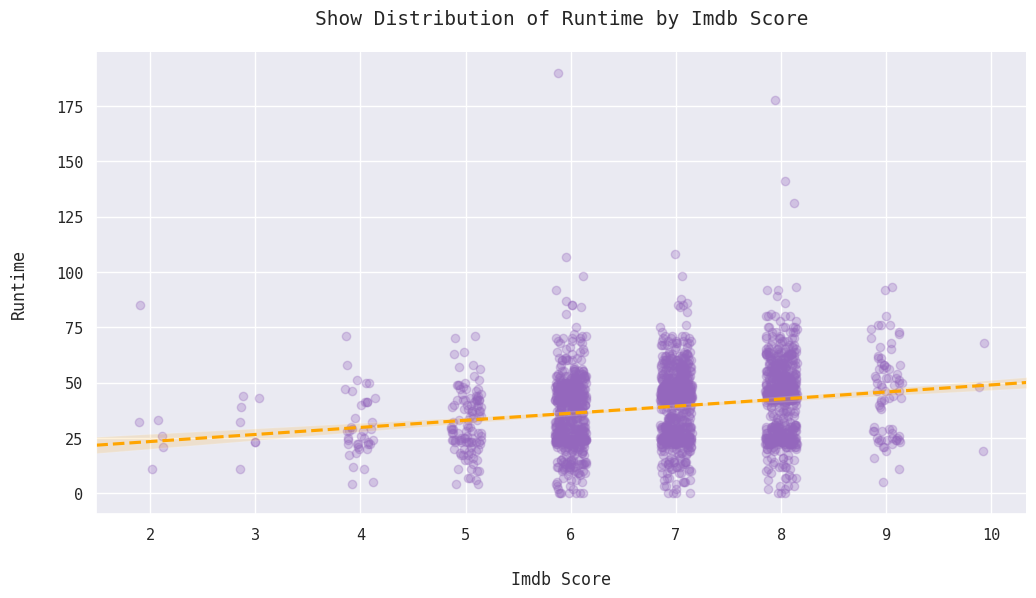

In [36]:
plt.figure(figsize=(12,6))
sns.regplot(data=netflix_shows, x='imdb_score', y='runtime', color='tab:purple', scatter_kws={'alpha':0.3},
            x_jitter=.15, line_kws={'color':'orange', 'linestyle':'dashed'}, truncate=False)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Runtime by Imdb Score')
plt.show()

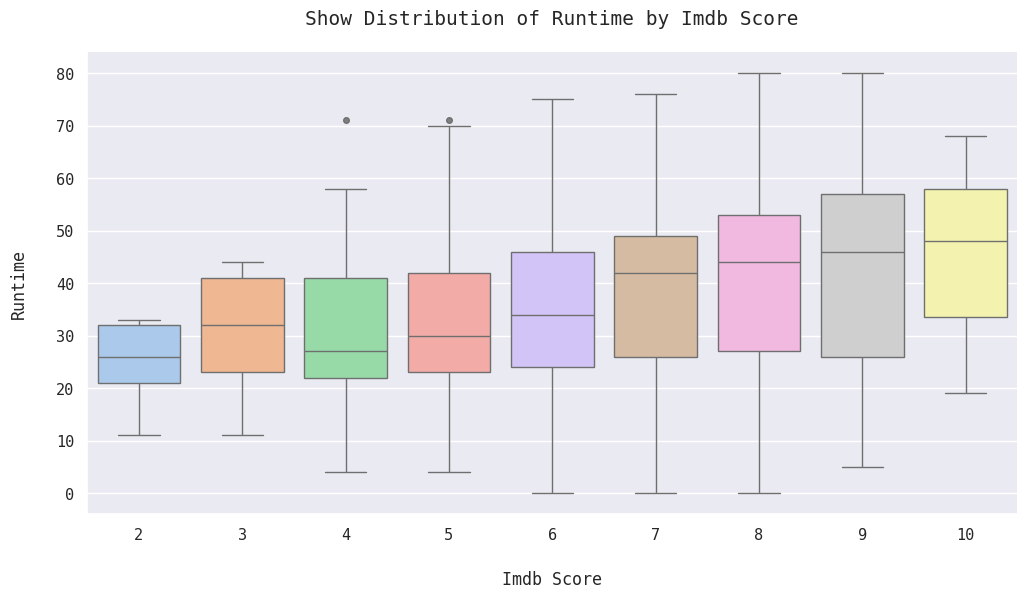

In [37]:
# Reducing outliers for boxplot
show_box2 = netflix_shows.loc[netflix_shows['runtime']<=80]

plt.figure(figsize=(12,6))
sns.boxplot(data=show_box2, x='imdb_score', y='runtime', palette='pastel', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Runtime by Imdb Score')
plt.show()

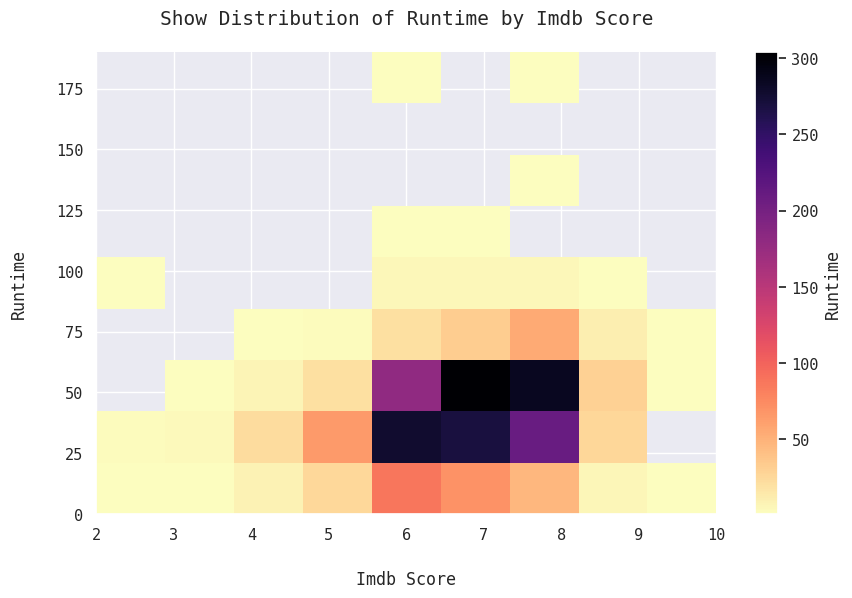

In [38]:
plt.figure(figsize=(10,6))
plt.hist2d(data=netflix_shows, x='imdb_score', y='runtime', cmap='magma_r', cmin=1, bins=9)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Runtime by Imdb Score')
plt.colorbar(label='Runtime')
plt.show()

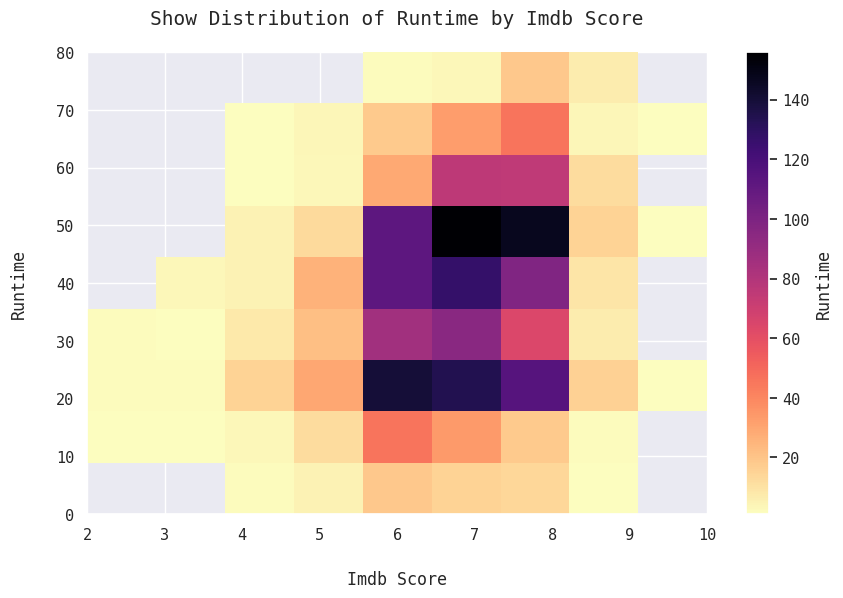

In [39]:
plt.figure(figsize=(10,6))
plt.hist2d(data=show_box2, x='imdb_score', y='runtime', cmap='magma_r', cmin=1, bins=9)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Show Distribution of Runtime by Imdb Score')
plt.colorbar(label='Runtime')
plt.show()

#### Show Distributions of Runtime by Imdb Score
Runtimes for shows stay under 100 minutes besides outliers as shown on the scatterplot. Dense population is 75 & below. Medians in the boxplot range from 25 - 45 minutes. Focusing in on the dense population depicted by scatterplot, most shows range from ~20 minutes - ~55 minutes. For some reason there are outliers extending to 0. Scores 4 - 9 gradually ramp up in runtime. Audiences appreciate having a likeable story that lasts for what they presumably consider a decent amount of time. The top heatmap also returns the same insights as the scatterplot. Drilling into the dark shaded region with the bottom heatmap, the mode for scores 7 & 8 are the same. Well received runtime lengths for scores 6-8 are ~25 minutes and ~50 minutes. Anything ranging from 20 - 70 minutes can captivate an audience. 
## *Research Question #5*
#### *For movies: is imdb score correlated to runtime?*
### Bivariate Analysis
* What imdb scores contain higher runtimes?
* At what region of runtime values is the population most dense?
* Do the outliers extend farther for movies than for shows?

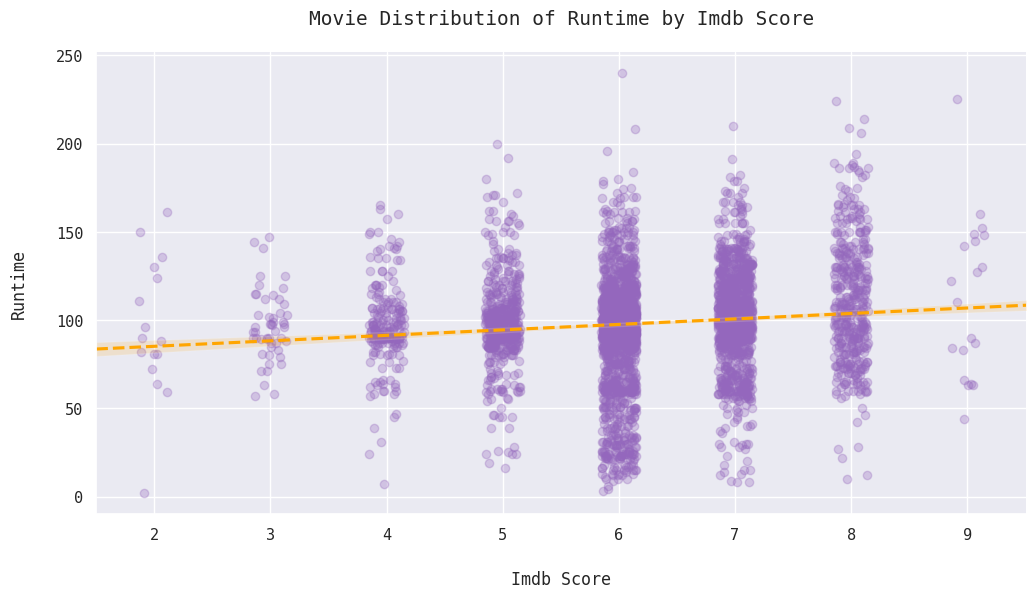

In [40]:
plt.figure(figsize=(12,6))
sns.regplot(data=netflix_movies, x='imdb_score', y='runtime', color='tab:purple', scatter_kws={'alpha':0.3},
            x_jitter=.15, line_kws={'color':'orange', 'linestyle':'dashed'}, truncate=False)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Movie Distribution of Runtime by Imdb Score')
plt.show()

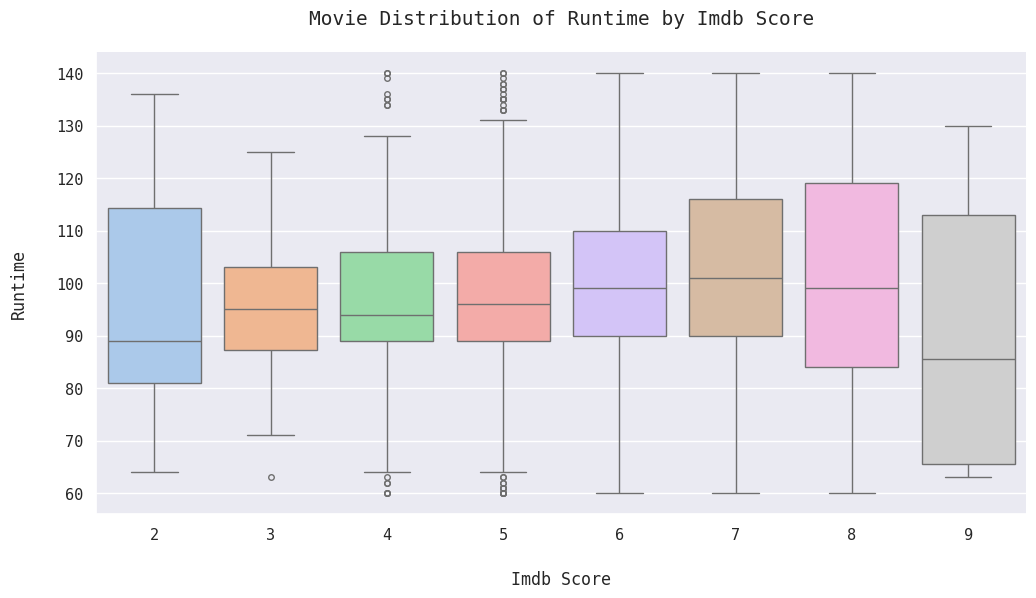

In [41]:
# Reducing outliers for boxplot
movie_box = netflix_movies.loc[(netflix_movies['runtime'] <= 140) & (netflix_movies['runtime'] >= 60)]

plt.figure(figsize=(12,6))
sns.boxplot(data=movie_box, x='imdb_score', y='runtime', palette='pastel', flierprops={'markerfacecolor': 'none', 
            'markersize': 4})
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Movie Distribution of Runtime by Imdb Score')
plt.show()

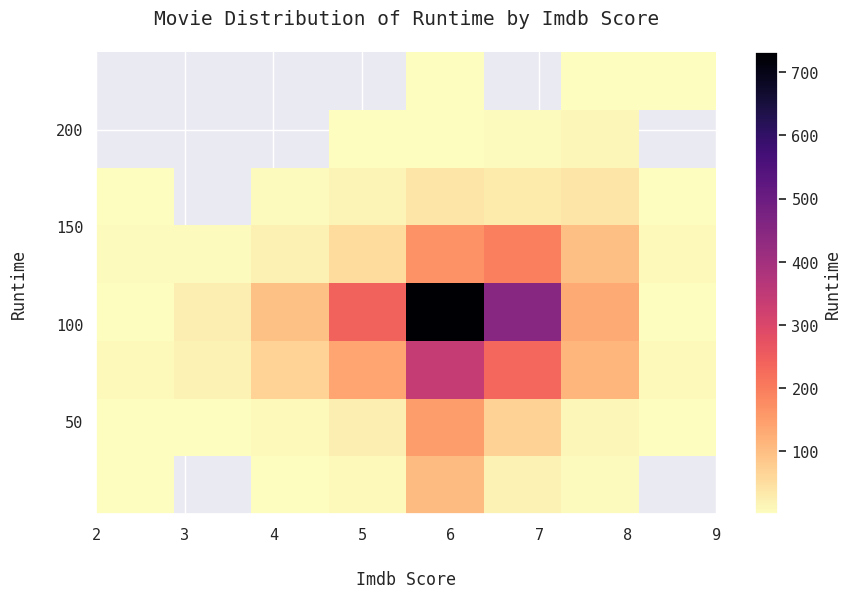

In [42]:
plt.figure(figsize=(10,6))
plt.hist2d(data=netflix_movies, x='imdb_score', y='runtime', cmap='magma_r', cmin=1, bins=8)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Movie Distribution of Runtime by Imdb Score')
plt.colorbar(label='Runtime')
plt.show()

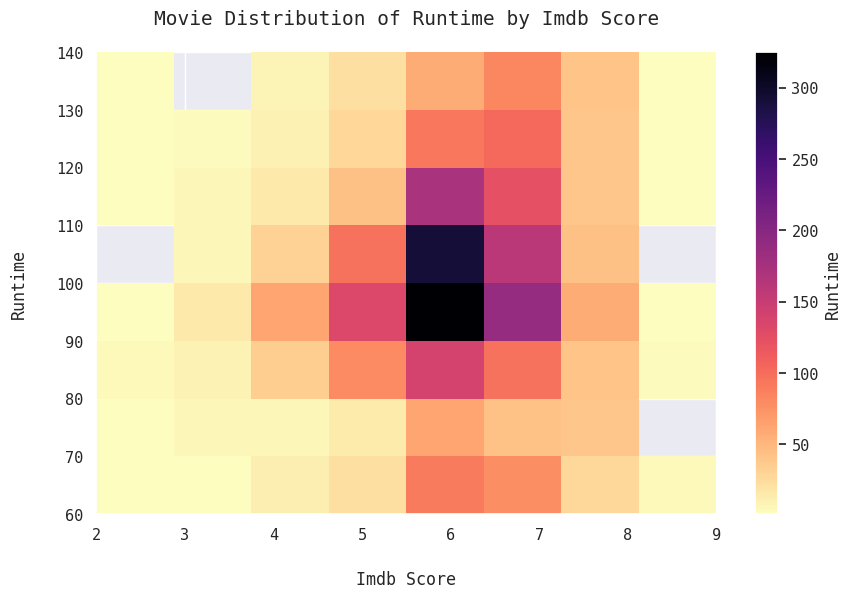

In [43]:
plt.figure(figsize=(10,6))
plt.hist2d(data=movie_box, x='imdb_score', y='runtime', cmap='magma_r', cmin=1, bins=8)
plt.ylabel('Runtime', labelpad=20)
plt.xlabel('Imdb Score', labelpad=20)
plt.title('Movie Distribution of Runtime by Imdb Score')
plt.colorbar(label='Runtime')
plt.show()

#### Movie Distribution of Runtime by Imdb Score Analysis
Scatter plot indicates max outlier: 240, min outlier: 2. Most movies generally have runtime below 175 mintues. The densest population region indicated by the scatterplot and top heatmap is 140 - 60 minutes. Similary to shows, scores 4, 6-8 gradually increase in runtime. 9, 3, and 2 have the diverse ranges compared to other scores, validating greater flexibility in runtime to obtain these scores. The scores between these however, have similar distributions and median (95-100) values. Shaded region of bottom heatmap shows 6 & 7 scores having similar runtime. 6 does contain runtime mode and the runnerup value to mode. Scores 4-7 are populated by runtimes 80-110. Scores 2, 3, 9 are only yellow due to their low density. Movies can maximize their imdb score by staying within the darker shaded region of bottom heatmap.
## *Research Question #6*
#### *For all videos: Is imdb score correlated to genres or age certification?*
### Bivariate Analysis
* What genres contain higher imdb scores?
* Which age certications contain higher imdb scores?
* Imdb score distribution for genres and age certifications?

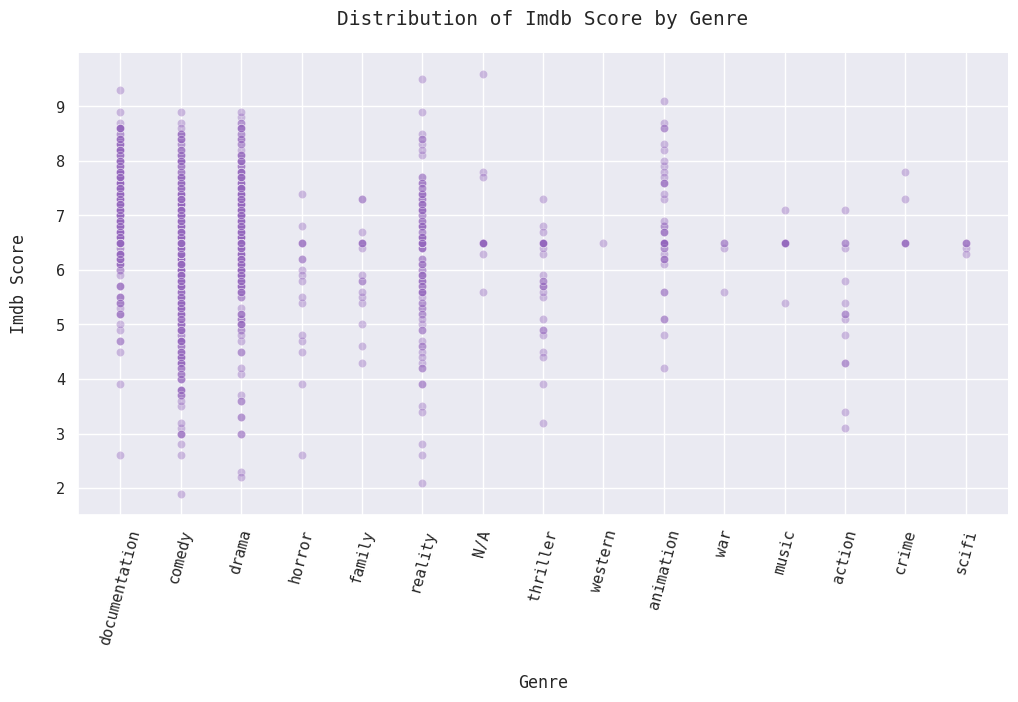

In [44]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=genre_sample, x='genre', y='imdb_score', color='tab:purple', alpha=0.4)
plt.ylabel('Imdb Score', labelpad=20)
plt.xlabel('Genre', labelpad=20)
plt.title('Distribution of Imdb Score by Genre')
plt.xticks(rotation=75)
plt.show()

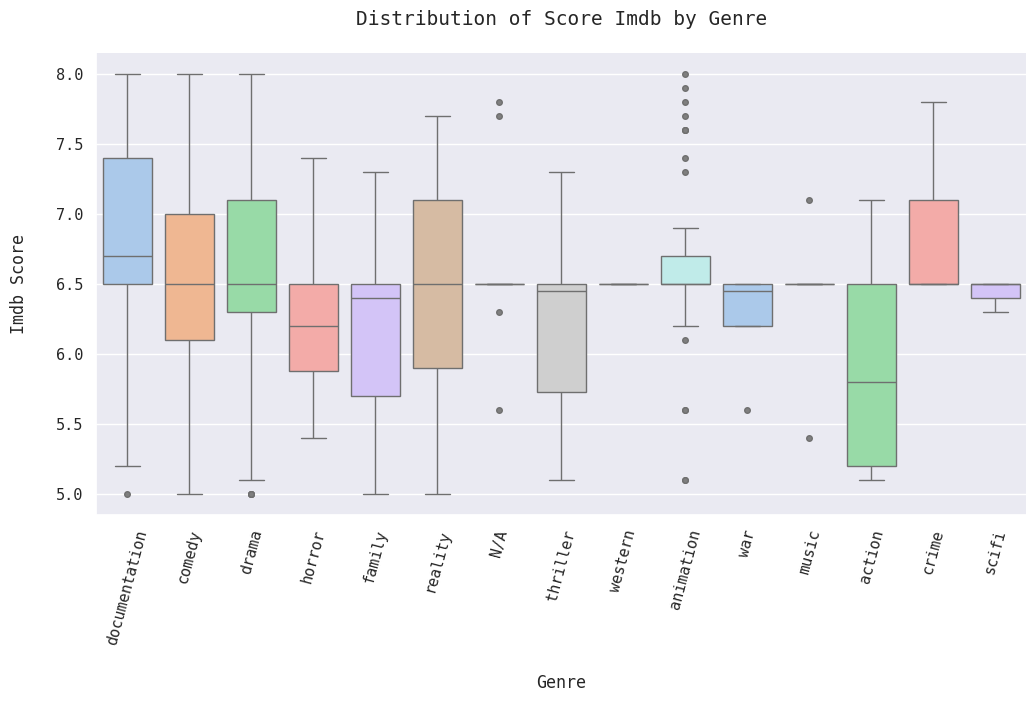

In [49]:
genre_box = genre_sample.loc[(genre_sample['imdb_score']<=8) & (genre_sample['imdb_score']>=5)]
plt.figure(figsize=(12,6))
sns.boxplot(data=genre_box, x='genre', y='imdb_score', palette='pastel', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.ylabel('Imdb Score', labelpad=20)
plt.xlabel('Genre', labelpad=20)
plt.title('Distribution of Score Imdb by Genre')
plt.xticks(rotation=75)
plt.show()

#### Distribution of Imdb by Genre Analysis
Inspecting the scatter plot highlights that score 9 and score 4 or lower contains outliers. Dense population for the chart population is contained within scores 8-5. The box plot is a snapshot of this dense distribution. Overall, medians and boxes vary. The left half of boxes besides N/A have medians around 6.5 and boxes ranges around 7.5 - 5.75. These genres are favored by audiences over others given the above average scores. Outliers across all genres range from min to max score, since no genre gets a free high score pass. The right half from western to scifi vary substantially more than left. Animations is outlier central, and distributions are tighter given the thinner boxes. Could be caused by lower populations of these genres since the subtable includes 1/4th of records.

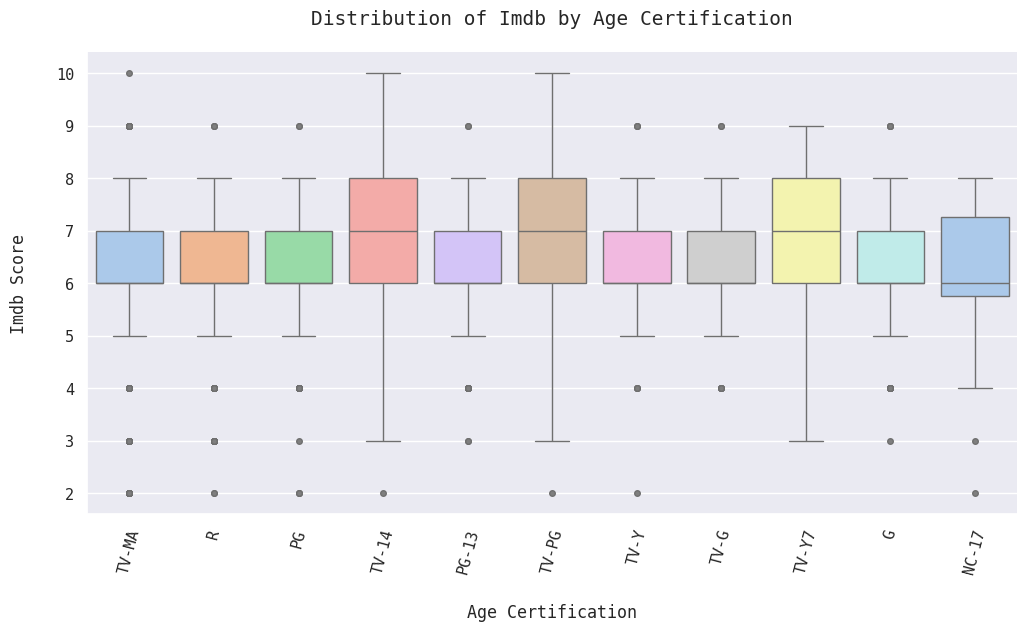

In [46]:
plt.figure(figsize=(12,6))
sns.boxplot(data=netflix, x='age_certification', y='imdb_score', palette='pastel', flierprops={'markerfacecolor': 'tab:grey', 
            'markersize': 4})
plt.ylabel('Imdb Score', labelpad=20)
plt.xlabel('Age Certification', labelpad=20)
plt.title('Distribution of Imdb by Age Certification')
plt.xticks(rotation=75)
plt.show()

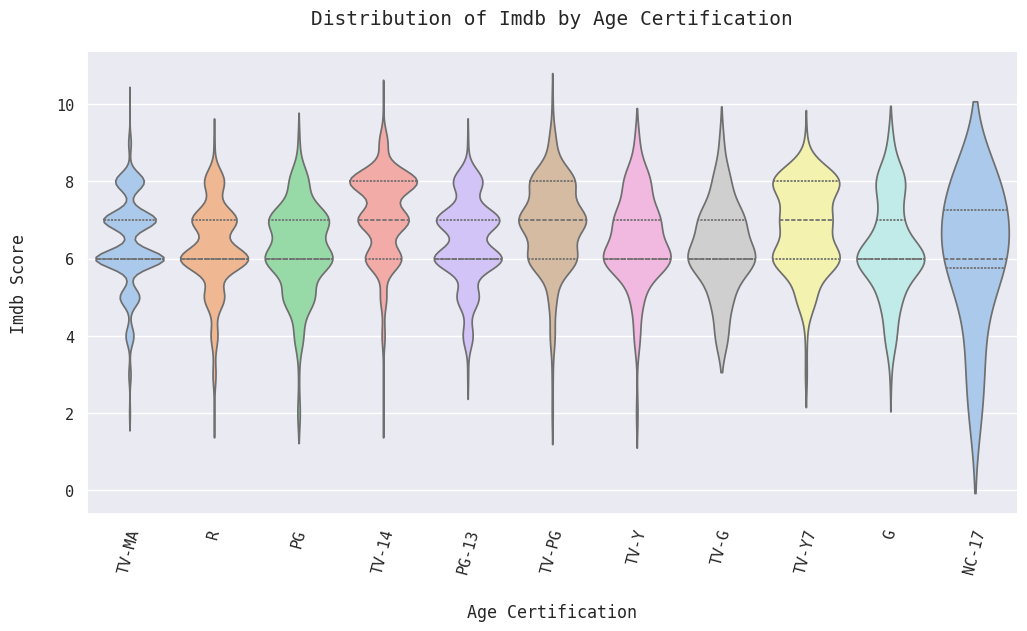

In [47]:
plt.figure(figsize=(12,6))
sns.violinplot(data=netflix, x='age_certification', y='imdb_score', palette='pastel', inner='quartiles')
plt.ylabel('Imdb Score', labelpad=20)
plt.xlabel('Age Certification', labelpad=20)
plt.title('Distribution of Imdb by Age Certification')
plt.xticks(rotation=75)
plt.show()

#### Distribution of Imdb by Age Certification Analysis
A wide range of values consisting of outliers shown by boxplot. Score 8 & above then 5 & below contrive the outlier range. Box plot shows dense distributions ranging from 6-8. 3 age certifications fully extend from 6-8 while others are half that. Violin plot better amplifies the distributions to detect minor differences between categories. Left half of violinplot indicate repeating values in imdb score more than right half. The pointy extensions from the center substantiate this. Right half is smoother, and diverse in values with the extreme case of this seen in NC-17. It's easier to land specific scores with the left half categories while right half is less forgiving/streamlined to specific scores.

In [55]:
# netflix.to_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Titles_Clean.csv")
# netflix_shows.to_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Shows_Clean.csv")
# netflix_movies.to_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_Movies_Clean.csv")
# genre_sample.to_csv(r"C:\Users\tekre\Downloads\Analysis Projects\06112023_Netflix_Analysis\06112023_Netflix_Exploratory\Tables\06112023_Netflix_GenreSample_Clean.csv")